In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import random
import math

import timeit
from functools import wraps
  
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

%matplotlib inline

## 4.1 最大子数组问题

### 分治法的算法实现

In [0]:
def find_max_crossing_subarray(A, low, high):
    if low == high:
        return (low, high, A[low])
    mid = (low + high) // 2
    left_sum_max, left_sum, left = -float('inf'), 0, 0
    for i in reversed(range(low, mid + 1)):
        left_sum += A[i]
        if left_sum > left_sum_max:
            left, left_sum_max = i, left_sum
    right_sum_max, right_sum, right = -float('inf'), 0, 0
    for i in range(mid+1, high+1):
        right_sum += A[i]
        if right_sum > right_sum_max:
            right, right_sum_max = i, right_sum
    return (left, right, left_sum_max + right_sum_max)


def find_max_subarray_recursion(A, low, high):
    """查找最大子数组的递归解法"""
    if low == high:
        return (low, high, A[low])
    mid = (low + high) // 2
    (left_low, left_high, left_max) = find_max_subarray_recursion(A, low, mid)
    (right_low, right_high, right_max) = find_max_subarray_recursion(A, mid + 1, high)
    (mid_low, mid_high, mid_max) = find_max_crossing_subarray(A, low, high)
    if left_max >= right_max and left_max >= mid_max:
        return (left_low, left_high, left_max)
    if right_max >= left_max and right_max >= mid_max:
        return(right_low, right_high, right_max)
    else:
        return(mid_low, mid_high, mid_max)

In [0]:
A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
print("A = " + str(A))
print("The result of is:" + str(find_max_subarray_recursion(A, 0, len(A) - 1)))
A = [random.randint(-5, 5) for i in range(10)]
print("A = " + str(A))
print("The result is:" + str(find_max_subarray_recursion(A, 0, len(A) - 1)))

A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
The result of is:(7, 10, 43)
A = [-2, 4, 5, 5, 3, -2, -3, 0, 0, -5]
The result is:(1, 4, 17)


### 练习

#### 4.1-1 A 中所有元素均为负数的情况

 - 当 A 中所有元素均为负数时，返回的数组中最小的负数

In [0]:
A = [random.randint(-10,-1) for i in range(10)]
print("A = " + str(A))
print("The result of is:" + str(find_max_subarray_recursion(A, 0, len(A) - 1)))

A = [-2, -3, -8, -4, -2, -1, -2, -4, -6, -3]
The result of is:(5, 5, -1)


#### 4.1-2 最大子数组问题的暴力解法

In [0]:
def find_max_subarray_brute_force(A):
    """查找最大子数组的暴力解法"""
    max_sum = -float('inf')
    left, right = 0, 0
    for i in range(len(A)):
        temp_sum = 0
        for j in range(i, len(A)):
            temp_sum += A[j]
            if temp_sum > max_sum:
                max_sum = temp_sum
                left, right = i, j
    return (left, right, max_sum)


In [0]:
 A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
print("A = " + str(A))
print("The result of is:" + str(find_max_subarray_brute_force(A)))
A = [random.randint(-5, 5) for i in range(10)]
print("A = " + str(A))
print("The result is:" + str(find_max_subarray_brute_force(A)))

A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
The result of is:(7, 10, 43)
A = [-4, -2, 5, -4, 5, -3, 5, 0, 1, -3]
The result is:(2, 8, 9)


#### 4.1-3 暴力解法加分治法

##### 暴力解法与分治法运行时间分析

In [0]:
recursive_time = list()
brute_force_time = list()
num = 100
B = [random.randint(-10, 10) for i in range(100)]
for i in range(1, 100):
    A = B[:i]
    recursive_time.append(timeit.timeit(wrapper(find_max_subarray_recursion, A, 0, len(A)-1), number=1000))
    brute_force_time.append(timeit.timeit(wrapper(find_max_subarray_brute_force, A), number=1000))

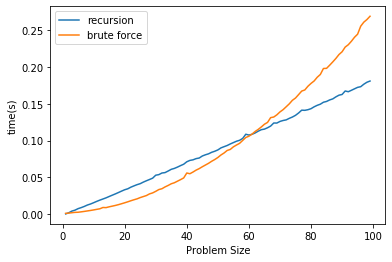

In [0]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(np.arange(1,len(recursive_time) + 1), recursive_time)
line2, =  ax.plot(np.arange(1,len(brute_force_time) + 1), brute_force_time)
ax.set_xlabel('Problem Size')
ax.set_ylabel('time(s)')
ax.legend([line1, line2], ['recursion', 'brute force'])

- 从上图中可看邮，输入规模大概在 70 以下时，暴力解法要优于分治算法
- 输入规模在 20 左右时，暴力解法的性能与分治法差别最大

##### 暴力解法与分治法相结合的算法实现

In [0]:
def find_max_subarray_recursion_and_brute_force(A, low, high, k):
    """查找最大子数组的递归解法"""
    if low == high:
        return (low, high, A[low])
    if high - low > k:
        mid = (low + high) // 2
        (left_low, left_high, left_max) = find_max_subarray_recursion_and_brute_force(A, low, mid, k)
        (right_low, right_high, right_max) = find_max_subarray_recursion_and_brute_force(A, mid + 1, high, k)
        (mid_low, mid_high, mid_max) = find_max_crossing_subarray(A, low, high)
        if left_max >= right_max and left_max >= mid_max:
            return (left_low, left_high, left_max)
        if right_max >= left_max and right_max >= mid_max:
            return(right_low, right_high, right_max)
        else:
            return(mid_low, mid_high, mid_max)
    max_sum = -float('inf')
    left, right = low, low
    for i in range(low, high+1):
        temp_sum = 0
        for j in range(i, high+1):
            temp_sum += A[j]
            if temp_sum > max_sum:
                max_sum = temp_sum
                left, right = i, j
    return (left, right, max_sum)

In [0]:
A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
print("A = " + str(A))
print("The result of is:" + str(find_max_subarray_recursion_and_brute_force(A, 0, len(A) - 1, 4)))
A = [random.randint(-5, 5) for i in range(10)]
print("A = " + str(A))
print("The result is:" + str(find_max_subarray_recursion_and_brute_force(A, 0, len(A) - 1, 4)))

A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
The result of is:(7, 10, 43)
A = [4, 3, -3, 5, 3, -5, 2, -2, 4, 2]
The result is:(0, 9, 13)


##### 输入规模的切换点对性能的影响

In [0]:
A = [random.randint(-10, 10) for i in range(10000)]
res_brute_and_recursion = list()
for k in range(0, 100, 2):
    res_brute_and_recursion.append(timeit.timeit(wrapper(find_max_subarray_recursion_and_brute_force, A, 0, len(A)-1, k), number=100))
recursion_time = timeit.timeit(wrapper(find_max_subarray_recursion, A, 0, len(A)-1), number=100)

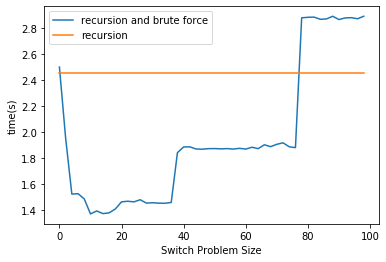

In [0]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(np.arange(0, 100, 2), res_brute_and_recursion)
line2, =  ax.plot(np.arange(0, 100, 2), [recursion_time for i in range(0, 100, 2)])
ax.set_xlabel('Switch Problem Size')
ax.set_ylabel('time(s)')
ax.legend([line1, line2], ['recursion and brute force', 'recursion'])

- 从图中的结果可看出，切换点选在 20 左右时，运行时间最短
- 当切换点在70左右时，算法的性能要低于单纯的分治算法，与暴力算法和分治算法的性能切换点基本相同

#### 4.1-4 允许空子数组作为结果

In [0]:
def find_max_crossing_subarray_positive(A, low, high):
    if low == high:
        return (low, high, A[low]) if A[low] >=0 else (None, None, 0)
    mid = (low + high) // 2
    left_sum_max, left_sum, left = 0, 0, None
    for i in reversed(range(low, mid + 1)):
        left_sum += A[i]
        if left_sum >= left_sum_max:
            left, left_sum_max = i, left_sum
    right_sum_max, right_sum, right = 0, 0, None
    for i in range(mid+1, high+1):
        right_sum += A[i]
        if right_sum >= right_sum_max:
            right, right_sum_max = i, right_sum
    return (left, right, left_sum_max + right_sum_max)


def find_max_subarray_recursion_positive(A, low, high):
    """查找最大子数组的递归解法"""
    if low == high:
        return (low, high, A[low])
    mid = (low + high) // 2
    (left_low, left_high, left_max) = find_max_subarray_recursion(A, low, mid)
    (right_low, right_high, right_max) = find_max_subarray_recursion(A, mid + 1, high)
    (mid_low, mid_high, mid_max) = find_max_crossing_subarray_positive(A, low, high)
    if left_max >= right_max and left_max >= mid_max:
        return (left_low, left_high, left_max)
    if right_max >= left_max and right_max >= mid_max:
        return(right_low, right_high, right_max)
    else:
        return(mid_low, mid_high, mid_max)

In [0]:
A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
print("A = " + str(A))
print("The result is:{}".format(str(find_max_subarray_recursion_positive(A, 0, len(A) - 1))))

A = [random.randint(-30, 1) for i in range(10)]
print("A = " + str(A))
print("The result is:" + str(find_max_subarray_recursion_positive(A, 0, len(A) - 1)))

A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
The result is:(7, 10, 43)
A = [-17, 1, -4, -4, -5, -22, -9, -11, -14, -8]
The result is:(1, 1, 1)


#### 4.1-5 非递归线性时间的算法

#### python 算法实现

In [0]:
def find_max_subarray_linear(A):
    """查找最大子数组的线性解法"""
    if len(A) == 1:
        return (0, 0, A[0])
    temp_sum, max_sum = A[0], -float('inf')
    temp_left, left, right = 0, 0, 0
    for i in range(1, len(A)):
        if A[i] > A[i] + temp_sum:
            temp_left = i
            temp_sum = A[i]
        else:
            temp_sum += A[i]
        if temp_sum > max_sum:
            max_sum = temp_sum
            left = temp_left
            right = i
    return (left, right, max_sum)

In [0]:
A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
print("A = " + str(A))
print("The result of is:" + str(find_max_subarray_linear(A)))
A = [random.randint(-5, 5) for i in range(10)]
print("A = " + str(A))
print("The result is:" + str(find_max_subarray_linear(A)))

A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
The result of is:(7, 10, 43)
A = [3, -4, -1, 2, 4, -5, -3, 3, 1, 2]
The result is:(3, 4, 6)


#### 各个算法的时间对比

In [0]:
recursive_time = list()
brute_force_time = list()
linear_time = list()
num = 100
B = [random.randint(-10, 10) for i in range(100)]
for i in range(1, 100):
    A = B[:i]
    recursive_time.append(timeit.timeit(wrapper(find_max_subarray_recursion, A, 0, len(A)-1), number=1000))
    brute_force_time.append(timeit.timeit(wrapper(find_max_subarray_brute_force, A), number=1000))
    linear_time.append(timeit.timeit(wrapper(find_max_subarray_linear, A), number=1000))

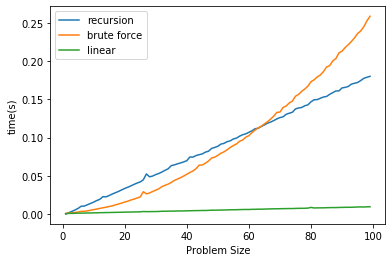

In [0]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(np.arange(1,len(recursive_time) + 1), recursive_time)
line2, =  ax.plot(np.arange(1,len(brute_force_time) + 1), brute_force_time)
line3, = ax.plot(np.arange(1,len(linear_time) + 1), linear_time)
ax.set_xlabel('Problem Size')
ax.set_ylabel('time(s)')
ax.legend([line1, line2, line3], ['recursion', 'brute force', 'linear'])

## 4.2 矩阵乘法的 Strassen 算法

### 暴力求解

In [0]:
def square_matrix_multiply_brute_force(A, B):
    C = [[0 for i in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            for k in range(len(A[0])):
                C[i][j] += A[i][k] * B[k][j]
    return C

In [0]:
    A = [[1, 3], [7, 5]]
    B = [[6, 8], [4, 2]]
    print ("A = {}".format(A))
    print ("B = {}".format(B))
    print("The result of square_matrix_multiply_brute_force is:{}".format(square_matrix_multiply_brute_force(A, B)))
    print("The result of numpy.dot is:{}".format(np.dot(A, B)))


    A = [[random.randint(0, 10) for i in range(4)] for j in range(4)]
    B = [[random.randint(0, 10) for i in range(4)] for j in range(4)]
    print ("A = {}".format(A))
    print ("B = {}".format(B))
    print("The result of square_matrix_multiply_brute_force is:{}".format(square_matrix_multiply_brute_force(A, B)))
    print("The result of numpy.dot is:{}".format(np.dot(A, B)))

A = [[1, 3], [7, 5]]
B = [[6, 8], [4, 2]]
The result of square_matrix_multiply_brute_force is:[[18, 14], [62, 66]]
The result of numpy.dot is:[[18 14]
 [62 66]]
A = [[0, 2, 10, 1], [6, 7, 1, 2], [9, 7, 2, 6], [0, 1, 5, 9]]
B = [[7, 4, 8, 4], [2, 0, 5, 0], [7, 0, 9, 9], [9, 6, 4, 7]]
The result of square_matrix_multiply_brute_force is:[[83, 6, 104, 97], [81, 36, 100, 47], [145, 72, 149, 96], [118, 54, 86, 108]]
The result of numpy.dot is:[[ 83   6 104  97]
 [ 81  36 100  47]
 [145  72 149  96]
 [118  54  86 108]]


### 分治法求解

In [0]:
def square_matrix_multiply_recursive(A, B):
    def _recursive(a_row, a_col, b_row, b_col, size):
        if size == 1:
            return [[A[a_row][a_col] * B[b_row][b_col]]]
        C = [[0 for i in range(size)] for j in range(size)]
        size = size // 2
        A11, A12, A21, A22 = (a_row, a_col), (a_row, a_col + size), \
                             (a_row + size, a_col), (a_row + size, a_col+size)
        B11, B12, B21, B22 = (b_row, b_col), (b_row, b_col + size), \
                             (b_row + size, b_col), (b_row + size, b_col+size)
        # 计算子矩阵相乘的结果
        A11B11 = _recursive(*A11, *B11, size)
        A11B12 = _recursive(*A11, *B12, size)
        A12B21 = _recursive(*A12, *B21, size)
        A12B22 = _recursive(*A12, *B22, size)
        A21B11 = _recursive(*A21, *B11, size)
        A21B12 = _recursive(*A21, *B12, size)
        A22B21 = _recursive(*A22, *B21, size)
        A22B22 = _recursive(*A22, *B22, size)
        # 子矩阵相加得到结果矩阵
        for i in range(size):
            for j in range(size):
                C[i][j]             = A11B11[i][j] + A12B21[i][j]   # C11
                C[i][j + size]      = A11B12[i][j] + A12B22[i][j]   # C12
                C[i+size][j]        = A21B11[i][j] + A22B21[i][j]   # C21
                C[i+size][j+size]   = A21B12[i][j] + A22B22[i][j]   # C22
        return C

    return _recursive(0, 0, 0, 0, len(A))

In [0]:
A = [[1, 3], [7, 5]]
B = [[6, 8], [4, 2]]
print ("A = {}".format(A))
print ("B = {}".format(B))
print("The result of square_matrix_multiply_recursive is:{}".format(square_matrix_multiply_recursive(A, B)))
print("The result of numpy.dot is:{}".format(np.dot(A, B)))


A = [[random.randint(0, 10) for i in range(4)] for j in range(4)]
B = [[random.randint(0, 10) for i in range(4)] for j in range(4)]
print ("A = {}".format(A))
print ("B = {}".format(B))
print("The result of square_matrix_multiply_recursive is:{}".format(square_matrix_multiply_recursive(A, B)))
print("The result of numpy.dot is:{}".format(np.dot(A, B)))

A = [[1, 3], [7, 5]]
B = [[6, 8], [4, 2]]
The result of square_matrix_multiply_recursive is:[[18, 14], [62, 66]]
The result of numpy.dot is:[[18 14]
 [62 66]]
A = [[1, 0, 4, 8], [10, 4, 2, 6], [7, 8, 9, 2], [6, 10, 7, 6]]
B = [[2, 9, 5, 4], [1, 6, 10, 9], [6, 6, 1, 3], [4, 4, 7, 7]]
The result of square_matrix_multiply_recursive is:[[58, 65, 65, 72], [60, 150, 134, 124], [84, 173, 138, 141], [88, 180, 179, 177]]
The result of numpy.dot is:[[ 58  65  65  72]
 [ 60 150 134 124]
 [ 84 173 138 141]
 [ 88 180 179 177]]


### Strassen 算法

In [0]:
def square_matrix_multiply_strassen(A, B):
    def _recursive(A, B, a_row, a_col, b_row, b_col, size):
        if size == 1:
            return [[A[a_row][a_col] * B[b_row][b_col]]]
        C = [[0 for i in range(size)] for j in range(size)]
        size = size // 2
        S = [[[0 for k in range(size)] for j in range(size)] for i in range(10)]
        A11, A12, A21, A22 = (a_row, a_col), (a_row, a_col + size), \
                             (a_row + size, a_col), (a_row + size, a_col+size)
        B11, B12, B21, B22 = (b_row, b_col), (b_row, b_col + size), \
                             (b_row + size, b_col), (b_row + size, b_col+size)
        for i in range(size):
            for j in range(size):
                S[0][i][j] = B[i+B12[0]][j+B12[1]] - B[i+B22[0]][j+B22[1]]
                S[1][i][j] = A[i+A11[0]][j+A11[1]] + A[i+A12[0]][j+A12[1]]
                S[2][i][j] = A[i+A21[0]][j+A21[1]] + A[i+A22[0]][j+A22[1]]
                S[3][i][j] = B[i+B21[0]][j+B21[1]] - B[i+B11[0]][j+B11[1]]
                S[4][i][j] = A[i+A11[0]][j+A11[1]] + A[i+A22[0]][j+A22[1]]
                S[5][i][j] = B[i+B11[0]][j+B11[1]] + B[i+B22[0]][j+B22[1]]
                S[6][i][j] = A[i+A12[0]][j+A12[1]] - A[i+A22[0]][j+A22[1]]
                S[7][i][j] = B[i+B21[0]][j+B21[1]] + B[i+B22[0]][j+B22[1]]
                S[8][i][j] = A[i+A11[0]][j+A11[1]] - A[i+A21[0]][j+A21[1]]
                S[9][i][j] = B[i+B11[0]][j+B11[1]] + B[i+B12[0]][j+B12[1]]
        P1 = _recursive(A, S[0], *A11, 0, 0, size)
        P2 = _recursive(S[1], B, 0, 0, *B22, size)
        P3 = _recursive(S[2], B, 0, 0, *B11, size)
        P4 = _recursive(A, S[3], *A22, 0, 0, size)
        P5 = _recursive(S[4], S[5], 0, 0, 0, 0, size)
        P6 = _recursive(S[6], S[7], 0, 0, 0, 0, size)
        P7 = _recursive(S[8], S[9], 0, 0, 0, 0, size)
        # P 矩阵相加得到结果矩阵
        for i in range(size):
            for j in range(size):
                C[i][j]             = P5[i][j] + P4[i][j] - P2[i][j] + P6[i][j]     # C11
                C[i][j + size]      = P1[i][j] + P2[i][j]                           # C12
                C[i+size][j]        = P3[i][j] + P4[i][j]                           # C21
                C[i+size][j+size]   = P5[i][j] + P1[i][j] - P3[i][j] - P7[i][j]     # C22
        return C

    return _recursive(A, B, 0, 0, 0, 0, len(A))

In [0]:
    A = [[1, 3], [7, 5]]
    B = [[6, 8], [4, 2]]
    print ("A = {}".format(A))
    print ("B = {}".format(B))
    print("The result of square_matrix_multiply_strassen is:{}".format(square_matrix_multiply_strassen(A, B)))
    print("The result of numpy.dot is:{}".format(np.dot(A, B)))

    size = 4
    A = [[random.randint(0, 10) for i in range(size)] for j in range(size)]
    B = [[random.randint(0, 10) for i in range(size)] for j in range(size)]
    print ("A = {}".format(A))
    print ("B = {}".format(B))
    print("The result of square_matrix_multiply_strassen is:{}".format(square_matrix_multiply_strassen(A, B)))
    print("The result of numpy.dot is:{}".format(np.dot(A, B)))

A = [[1, 3], [7, 5]]
B = [[6, 8], [4, 2]]
The result of square_matrix_multiply_strassen is:[[18, 14], [62, 66]]
The result of numpy.dot is:[[18 14]
 [62 66]]
A = [[4, 10, 7, 10], [2, 10, 9, 5], [2, 6, 10, 1], [2, 10, 3, 4]]
B = [[9, 2, 2, 2], [2, 4, 7, 0], [3, 2, 0, 1], [8, 7, 10, 3]]
The result of square_matrix_multiply_strassen is:[[157, 132, 178, 45], [105, 97, 124, 28], [68, 55, 56, 17], [79, 78, 114, 19]]
The result of numpy.dot is:[[157 132 178  45]
 [105  97 124  28]
 [ 68  55  56  17]
 [ 79  78 114  19]]


### 练习

#### 4.2-3 strassen 算法适应 n 不是 2 的幂的情况

- 参照 https://atekihcan.github.io/CLRS/E04.02-03/ 的算法

In [0]:
def strassen(A, B):
    """适应方阵长度不为 2 的次幂的情况"""
    m = math.log(len(A), 2)
    size = 2 ** math.ceil(m)
    if size != len(A):
        A1 = [[0 for i in range(size)] for j in range(size)]
        B1 = [[0 for i in range(size)] for j in range(size)]
        C = [[0 for i in range(len(A))] for j in range(len(A))]
        for i in range(len(A)):
            for j in range(len(A)):
                A1[i][j] = A[i][j]
                B1[i][j] = B[i][j]
        C1 = square_matrix_multiply_strassen(A1, B1)
        for i in range(len(A)):
            for j in range(len(A)):
                C[i][j] = C1[i][j]
        return C
    return square_matrix_multiply_strassen(A, B)

In [0]:
size = 6
A = [[random.randint(0, 10) for i in range(size)] for j in range(size)]
B = [[random.randint(0, 10) for i in range(size)] for j in range(size)]
print ("A = {}".format(A))
print ("B = {}".format(B))
print("The result of strassen is:{}".format(strassen(A, B)))
print("The result of numpy.dot is:{}".format(np.dot(A, B)))

A = [[3, 0, 8, 10, 6, 8], [2, 0, 10, 3, 6, 5], [5, 6, 9, 9, 0, 6], [9, 4, 5, 4, 9, 8], [10, 10, 10, 9, 3, 2], [9, 9, 6, 2, 9, 10]]
B = [[9, 3, 10, 6, 4, 6], [10, 8, 2, 4, 2, 4], [4, 8, 8, 6, 3, 5], [3, 7, 7, 10, 1, 5], [5, 5, 3, 2, 10, 7], [1, 10, 4, 7, 2, 10]]
The result of strassen is:[[127, 253, 214, 234, 122, 230], [102, 187, 159, 149, 111, 169], [174, 258, 221, 240, 80, 204], [206, 252, 225, 214, 169, 258], [274, 288, 280, 270, 133, 236], [256, 306, 237, 234, 184, 293]]
The result of numpy.dot is:[[127 253 214 234 122 230]
 [102 187 159 149 111 169]
 [174 258 221 240  80 204]
 [206 252 225 214 169 258]
 [274 288 280 270 133 236]
 [256 306 237 234 184 293]]


#### 4.2-5

In [0]:
math.log(132464, 68)

2.7951284873613815

In [0]:
math.log(143640, 70)

2.795122689748337

In [0]:
math.log(155424, 72)

2.795147391093449

In [0]:
math.log(7, 2)

2.807354922057604

## 课堂习题

### 在 $lg(n)$ 的时间内求解斐波那契数列

基本思路：
$$
\left[\begin{array}{cc} 
    F(n) &    F(n-1)    \\ 
    F(n-1) &    F(n-2)   
\end{array}\right] = \left[\begin{array}{cc} 
    1 &    1   \\ 
    1 &    0 
\end{array}\right]^{n-1} \quad n \ge 2
$$